<a href="https://colab.research.google.com/github/dong-uk-kim97/kaggle_study/blob/main/DieTanic_complete__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 예측을 위한 EDA(Dietanic)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


때때로 인생에는 잔인한 유머 감각이 있어 가능한 최악의 시간에 항상 원했던 것을 제공합니다. -Lisa Kleypas

타이타닉호의 침몰은 역사상 가장 악명 높은 난파선 중 하나입니다. 1912년 4월 15일 첫 항해 중 타이타닉호는 빙산과 충돌하여 침몰하여 승객과 승무원 2224명 중 1502명이 사망했습니다. 그래서 이름이 DieTanic입니다. 이것은 세계 어느 누구도 잊을 수 없는 매우 잊을 수 없는 재난입니다.

타이타닉을 만드는 데 약 750만 달러가 들었고 충돌로 인해 바다에 가라앉았습니다. Titanic Dataset은 초보자가 데이터 과학 여행을 시작하고 Kaggle대회에 참가할 수 이쓴 매우 좋은 데이터셋입니다.

이 노트북의 목적은 예측 모델링 문제의 워크플로우가 어떤 것인지 아이디어를 제공하는 것입니다. 기능을 확인하는 방법, 새로운 기능 및 일부 머신러닝 개념을 추가하는 방법. 나는 초보자도 모든 단계를 이해할 수 있도록 노트북을 가능한 한 기본적으로 유지하려고 노력했습니다.

당신이 노트북을 좋아하고 그것이 당신을 도왔다 생각한다면 투표해주세요. 계속 동기부여가 됩니다.

## 노트북의 내용:


### Part1: 탐색적 데이터 분석(EDA):

1) feature 분석.

2) 다양한 feature들을 고려하여 관련성과 추세를 찾는 것.

### Part2: Feature Engineering과 데이터 정리

1) 몇 가지 feature 추가.

2) 중복 기능 제거.

3) feature를 모델링에 적합한 형태로 변환

### Part3: 예측 모델링

1) 기본 알고리즘 실행.

2) 교차 검증.

3) 앙상블.

4) 중요 기능 추출.

## Part1:탐색적 자료 분석(EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('/content/drive/MyDrive/dietanic/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


데이터의 head()를 살펴보면서, 데이터가 어떤 식으로 구성되었는지 확인한다. 

In [5]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

isnull()을 통해서 Null값이 있는지 확인한다.

**나이, 탑승호실 그리고 탑승항구**는 Null값을 가진다. 나는 Null값들을 고칠 예정이다.

**얼마나 많이 살아남았나?**

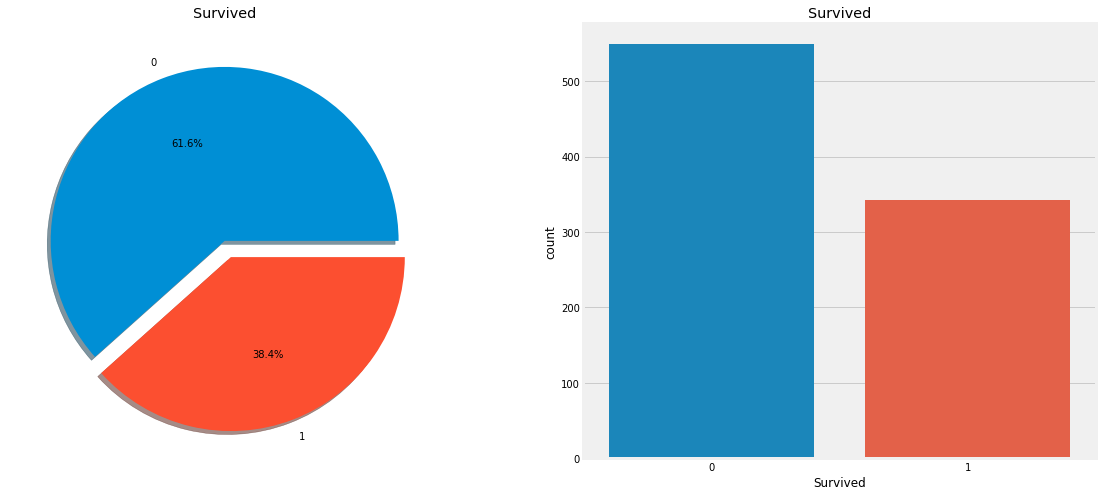

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

사고에서 살아남은 승객은 많지 않은 것이 분명합니다.

trainset에 있는 891명의 승객 중 약 350명만 생존했습니다. 즉, 전체 trainset의 38.4%만이 충돌에서 생존했습니다. 데이터에서 더 나은 통찰력을 얻고 생존한 승객 범주와 생존하지 못한 승객 범주를 확인하려면 더 자세히 조사해야 합니다.

데이터셋의 다양한 기능을 사용하여 생존율을 확인하려고 합니다. 일부 기능은 성별, 출항한 항구, 나이 등입니다. 

먼저 다양한 유형의 feature를 이해하겠습니다.

### **Features의 유형**

#### Categorical Features: (카테고리형 Feature)
카테고리형 변수(Categorical Variable)은 그 값으로 두 개 이상의 카테고리를 가지고 각각의 값으로 feature가 카테고리화 될 수 있습니다. 예를 들어 성별은 두 개의 카테고리(남성과 여성)를 가진 카테고리형 변수입니다. 이런 변수는 순서를 부여할 수 없습니다.
다른 말로 명목변수(Nominal Variable)라고도 합니다.

- 데이터셋의 Categorical Feature : Sex, Embarked


#### Ordinal Features:(순서형 Feature)
순서형 변수(Ordinal Variable)은 카테고리형 변수와 비슷하지만, 변수 안 각 값들간 상대적인 순서, 분류를 부여할 수 있다는 점이 다릅니다. 가령 Tall, Medium, Short의 값을 가진 Height와  같은 feature는 순서형 변수입니다. 이 변수 안에서 우리가 상대적인 분류가 가능하기 때문입니다.

- 데이터셋의 Ordinal Feature : Pclass

#### Continuous Features: (연속형 Feature)
어떤 변수가 특정 두 지점, 혹은 최댓값과 최솟값 사이에 어떤 값이든 가질 수 있다면 그 변수는 연속형입니다. 

- 데이터셋의 Continuous Feature : Age

Categorial Variable은 순서를 매길 수 있느냐 없느냐로 Nomial Data와 Ordinal Data로 나뉜다.

Nominal Data는 원칙적으로 숫자로 표시할 수 없으나, 편의상 숫자화한 것을 말한다. (순위의 개념이 없음)

Ordianal Data는 원칙적으로 숫자로 표시할 수 없으나, 편의상 숫자화(순위의 개념이 있음) 
Example) 소득분위 10분위 > 9분위> 8분위


Numeric Data는 데이터가 연속량으로 있는지 없는지로 구분한다.

Continuous Data는 데이터가 연속량으로서 셀 수 있는 형태인 것을 말한다.
Example) 키 - 166.1cm

Discrete Data는 데이터가 비연속량으로서 셀 수 있는 형태를 말한다.
Example) 자식 수 5명

속성간의 관계 분석을 할 때 데이터 조합에 따라 나뉜다.

Categorical - Categorical조합은 요약 통계는 교차 테이블을, 시각화는 모자이크 플롯으로 하는 것이 유리할 수 있다.

Numeric-Categorical은 요약 통계는 카테고리별 통계 값을, 시각화는 박스 플롯이 유리할 수 있다.

Numeric-Numeric은 요약 통계는 상관계수를, 시각화는 산점도로 표현하는 게 유리할 수 있다.

### Feature 분석하기

#### Sex -> Categorical Feature

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

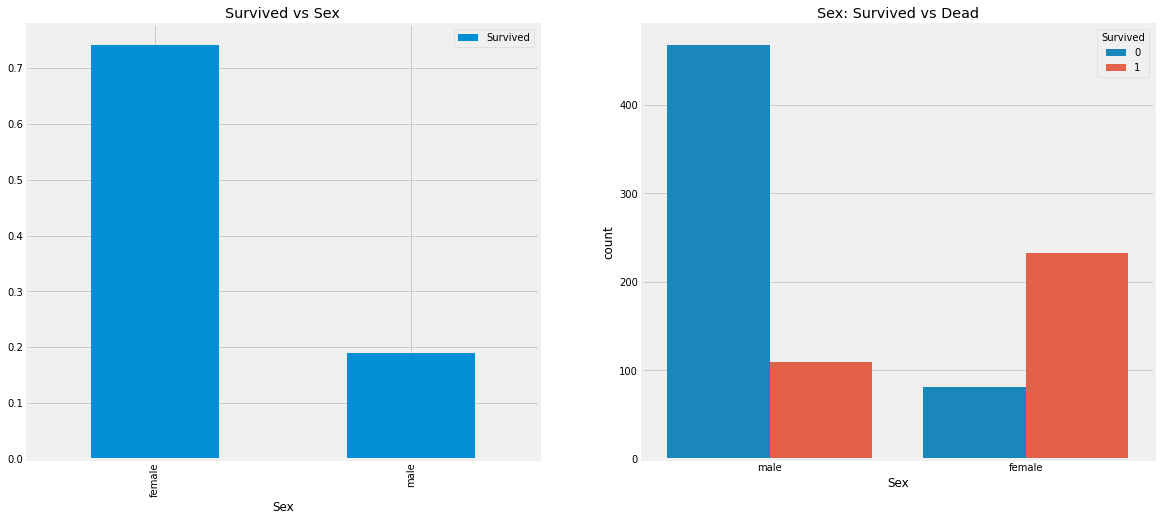

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

흥미로운 결과입니다. 남자 탑승객의 수가 여자 탑승객의 수보다 훨씬 많습니다. 그렇지만 여자 생존 탑승객의 수가 남자 생존 탑승객의 수보다 거의 두 배 많습니다. 여성의 생존률은 약 75% 정도인데 반해 남자의 생존률은 18~19% 정도입니다. 때문에 성별은 모델링에 매우 중요한 feature일 것입니다.

하지만 이것이 최선일지 다른 feature들을 살펴보겠습니다.

타겟 라벨인 생존을 성별에 따라 분류했다. 이 분류를 시각화해서 가시성을 높였다.

#### Pclass --> Ordinal Feature

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass : Survived vs Dead.')

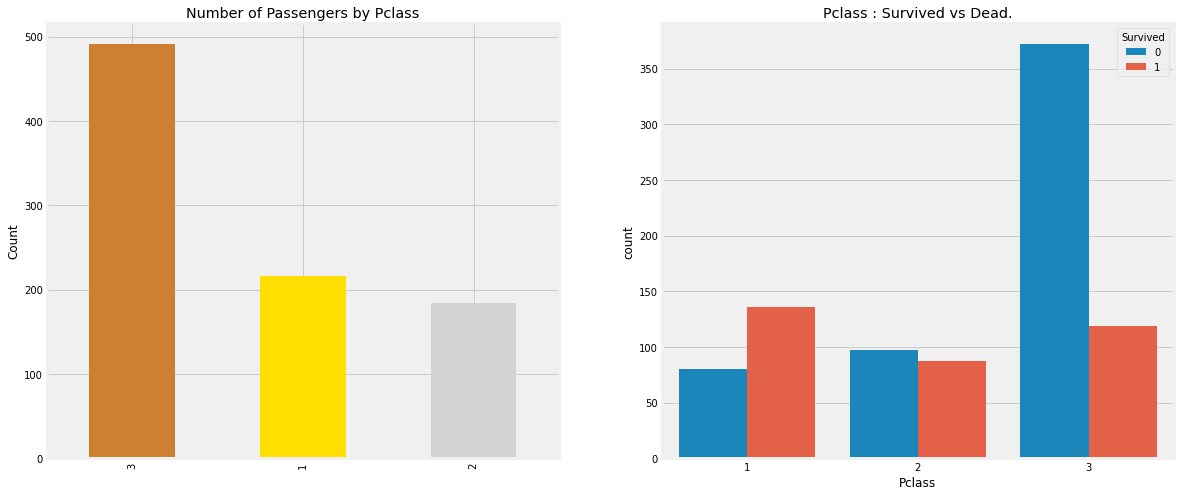

In [10]:
f, ax = plt.subplots(1,2, figsize=(18,8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead.')

돈으로 모든 것을 살 수 없다고 흔히들 말하지만 Pclass 1의 생존자가 구조 시에 매우 우선 순위에 있었던 것 같습니다. 

Pclass 3의 탑승객 수가 훨씬 많았지만, 생존자 비율은 25% 정도로 매우 낮습니다.
Pclass 1의 생존률은 63%, Pclass2의 생존률은 48% 정도입니다. 결국, 돈과 지위가 중요한 요소로 작용한 듯 합니다.

다른 흥미로운 점을 찾기 위해 더 들어가보겠습니다. 이번에는 Sex와 Pclass를 함께 두고 생존률을 체크해보겠습니다.

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

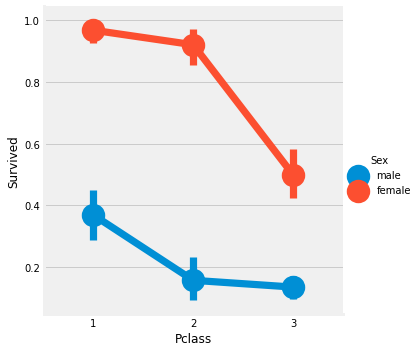

In [12]:
sns. factorplot('Pclass', 'Survived', hue='Sex', data=data)

plt.show()

이번 케이스에서는 Categorical Value를 쉽게 보기 위해 Factor Plot을 사용했습니다. Crosstab과 FactorPlot을 보면 Pclass 1여성 탑승객의 생존률이 95~96% 가량으로 사망자는 3명 정도만 있습니다. 

그리고 Pclass와 무관하게, 여성이 구조에 있엉서 우선 순위에 있었습니다. 남성의 경우 Pclass 1라도 생존률은 매우 낮습니다.

Pclass 또한 중요한 feature로 보입니다. 다른 feature를 또 분석하겠습니다.

#### Age-> Continuous Feature

In [13]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


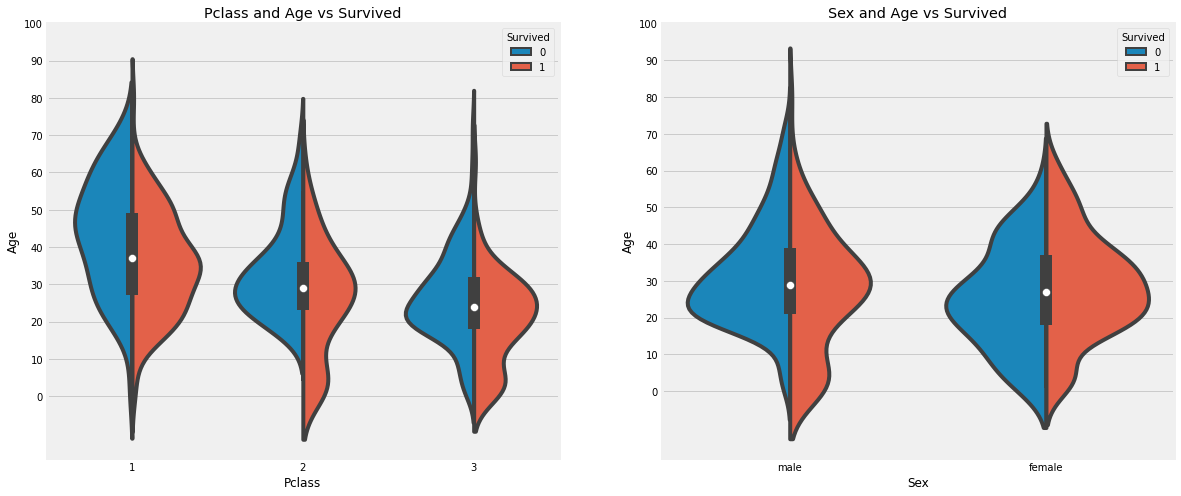

In [14]:
f, ax = plt.subplots(1,2, figsize = (18,8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split = True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split = True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

#### 관찰결과:


1.   Pclass 등급이 낮아짐(1 to 3)에 따라 어린이의 수는 증가하고, 10세 이하의 탑승객의 수는 Pclass수와 관계없이 좋아집니다.
2.   20~50세 사이의 Pclass 1 탑승률은 높고, 여성의 경우에는 더욱 높습니다.
3.   남성은 연령이 증가할수록 생존 확률이 줄어듭니다.



앞에서 본 것처럼, Age Feature는 177개의 Null값을 가지고 있습니다. 이 값들을 데이터 셋의 평균 값으로 대체할 수 있습니다. 하지만 사람들의 연령은 많고 다양합니다. 우리는 자칫 4세 아이의 연령에게 평균 연령29세를 부여할 수도 있습니다. 

승객이 어떤 연령대에 속했는지 알 수 있는 방법이 없을까요? 우리는 이를 위해 Name Feature를 체크해볼 수 있습니다. Name을 보면 Mr와 Mrs와 같은 salutation이 있습니다.

그렇기 때문에 Mr와 Mrs의 평균 값을 각각의 그룹에 부여할 수 있습니다. Name을 통해 Feature를 추출할 수 있습니다.

In [15]:
data['Initial'] = 0 
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # salutation을 추출

정규표현식 ([A-Za-z]+).를 사용했습니다. 이 정규표현식은 A-Z또는 a-z사이의 문자열과 그 뒤에 있는.(dot)을 찾아냅니다. 

이것으로 Name에서 Salutation을 추출했습니다.

In [16]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') # 성별에 따른 Initial 체크

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Miss를 나타내는 Mlle, Mme와 같은 잘못 적힌 Initial이 있습니다. 이 값들을 Miss등의 다른 값들로 대체하겠습니다.

In [17]:
data['Initial'].replace(['Mlle', 'Mme','Ms','Dr','Major', 'Lady', 'Countess','Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean() # Initial에 따른 평균 연령 체크

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### 연령 NaN 채우기

In [19]:
# 평균의 올림 값들로 NaN 값에 할당
data.loc[(data.Age.isnull()) & (data.Initial=='Mr') , 'Age' ] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 46

In [20]:
data.Age.isnull().any() # Null값들이 완전히 제거되었습니다.

False

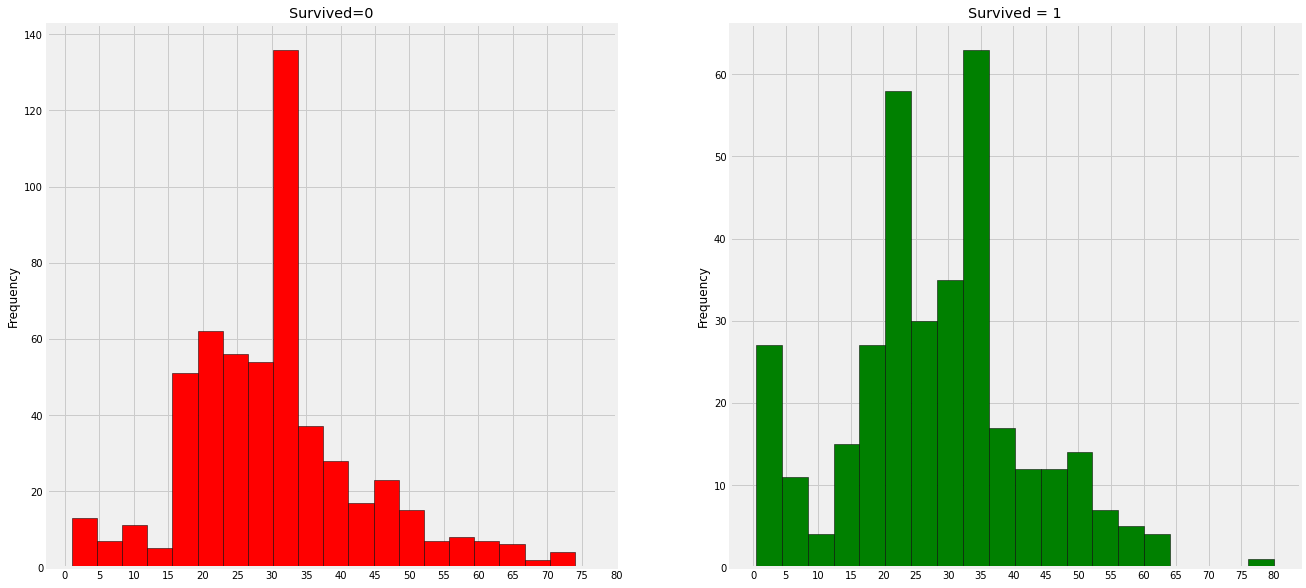

In [21]:
f, ax = plt.subplots(1,2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived=0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor = 'black', color = 'green')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

#### 관찰결과:


1.   5세 이하의 아이들은 가장 많이 생존했습니다. (여성과 아이 우선)
2.   가장 고연령 탑승객도 생존했습니다. (80세)
3.   가장 많은 수의 사망자가 있는 연령 그룹은 30~40세 입니다.



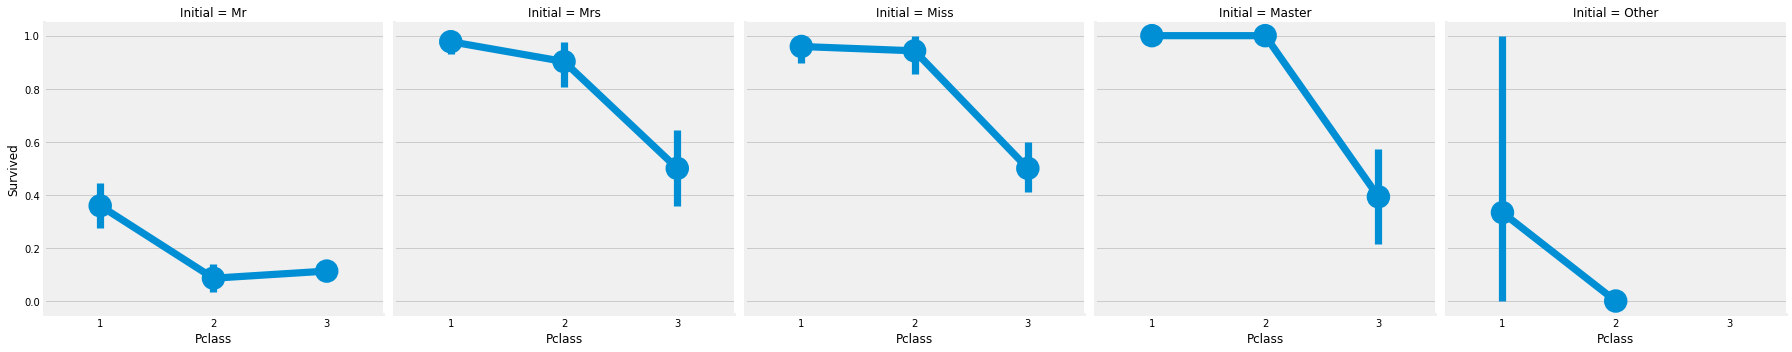

In [22]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data=data)
plt.show()

각 클래스와 관계없이 여성과 아이가 우선되었다는게 명확해 보입니다.

#### Embarked -> Categorical Value

In [23]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(cmap='summer_r')

#### 탑승 항구에 따른 생존확률

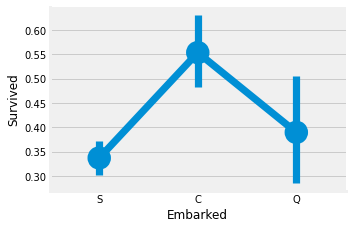

In [24]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

C항구의 생존률이 약 0.55 정도로 가장 높고, S항구가 가장 낮습니다.

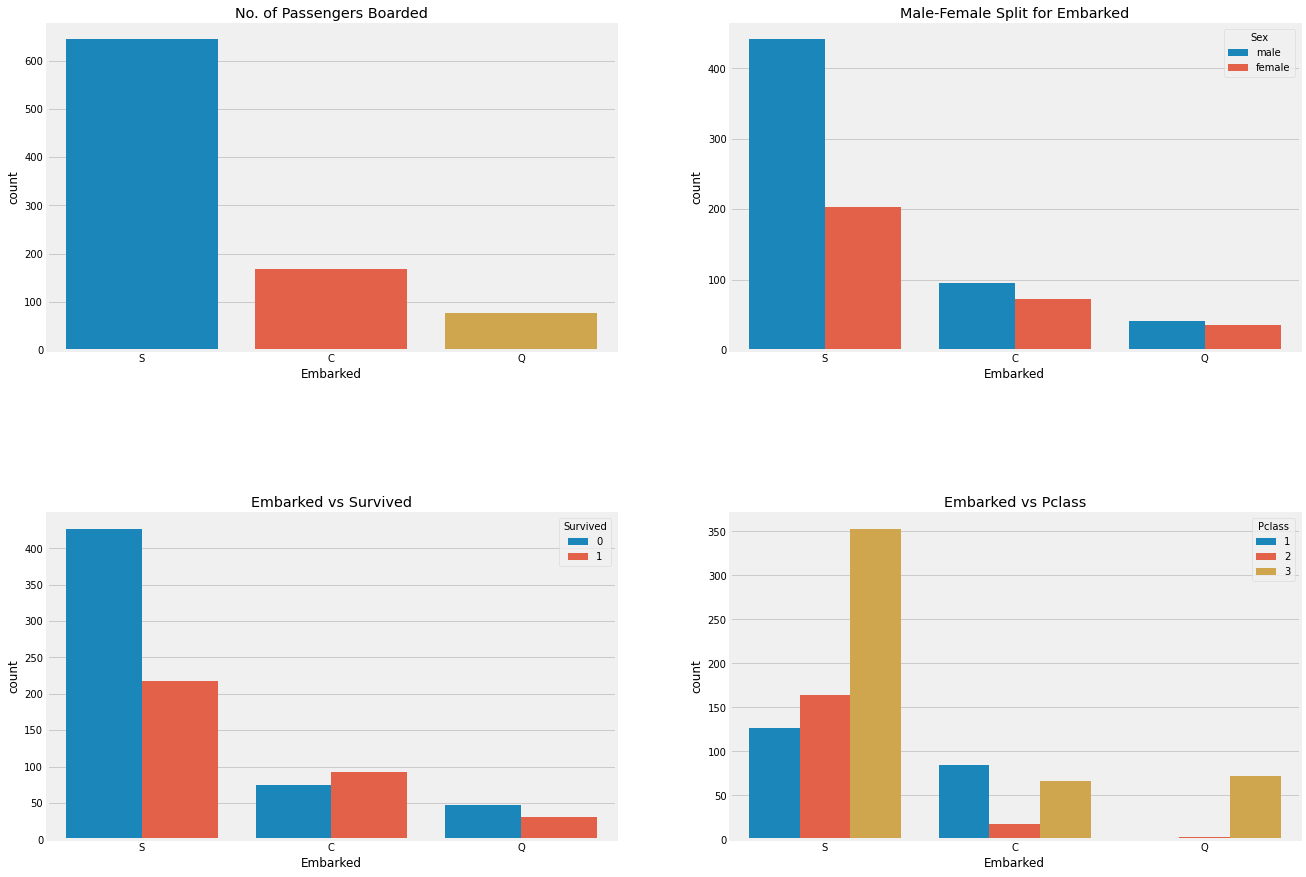

In [25]:
f, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')
sns. countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

##### 관찰결과:


1.   S에서 가장 많은 승객이 탑승했습니다. 그리고 그 탑승객들의 대부분은 Pclass 3입니다.
2.   C에서 탑승한 승객은 생존률이 높아 운이 좋아보입니다. Pclass 1과 2의 승객이기 때문일 거 같습니다.
3.   S항구에서 다수의 부유한 사람들이 탑승한 것 같습니다. 이 그룹의 생존률은 낮은데, 약 81%가 생존하지 못한 Pclass 3의 승객이기 때문이다.
4.   Q항구에서 탑승한 승객의 95% 가량이 Pclass 3이다.



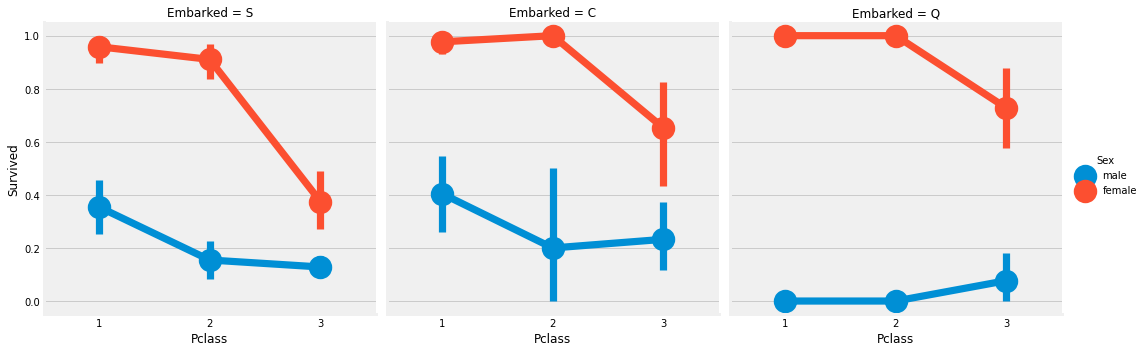

In [26]:
sns.factorplot('Pclass','Survived', hue='Sex', col= 'Embarked',data=data)
plt.show()

#### 관찰결과:


1.   Pclass 1과 Pclass 2 여성의 생존률은 Pclass와 관계 없이 거의 1입니다.
2.   S 항구에서 탑승한 Pclass 3의 탑승객은 매우 운이 없는 것 같습니다. 남성과 여성의 생존률이 모두 낮습니다. (돈이 중요한 요소입니다.)
3.   Q 항구에서 탑승한 남성이 제일 불운해 보입니다. 그들 대부분이 Pclass 탑승객이기 때문입니다.



#### Embarked의 NaN 채우기

대부분의 탑승객이 S에서 탑승했기 때문에 S로 채워주겠습니다.

In [27]:
data['Embarked'].fillna('S', inplace=True)

In [28]:
data['Embarked'].isnull().any() # NaN이 모두 제거되었습니다.

False

#### SibSp->Discrete Feature

이 Feature는 탑승개이 혼자인지 아니면 가족과 함께 탔는지를 나타냅니다. 


Sibling -> 형제자매, 의붓형제자매 / Spouse -> 배우자

In [29]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


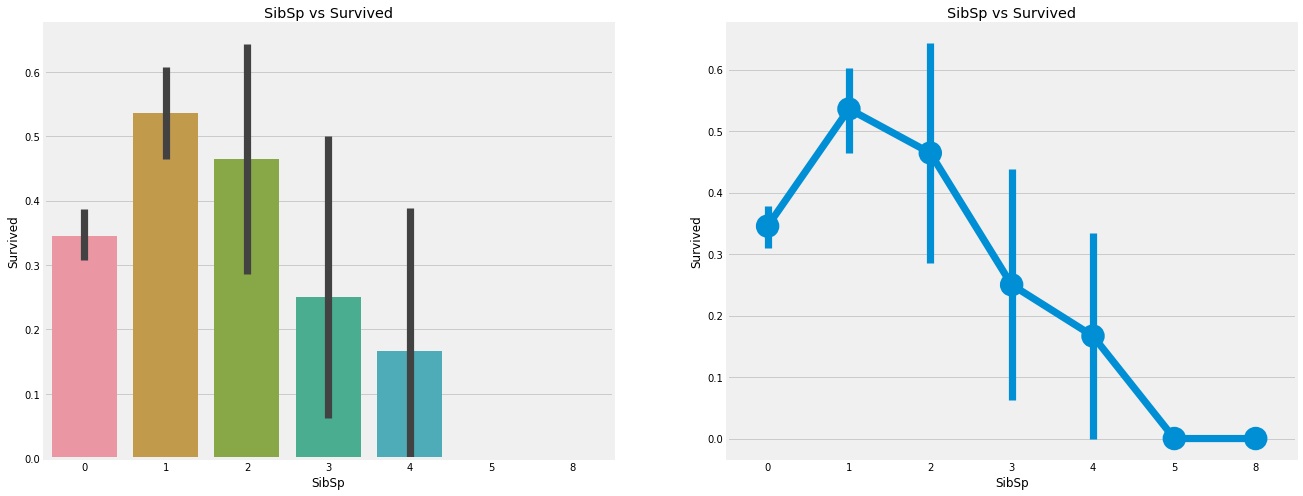

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [31]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### 관찰결과:
barplot과 pointplot을 통해 봤을 때, 승객이 혼자 탑승했을 때 생존률이 34.5% 정도입니다. 그래프의 기울기는 형제자매, 배우자의 수가 증가하면 그래프의 기울기는 감소합니다. 이해가 가는 결과입니다.

만약, 가족과 함께 탔다면 내가 생존하기 전에 가족을 살리려고 할 것이기 때문입니다. 하지만 놀랍게도 가족의 수가 5-8명인 경우에는 생존률이 0%입니다. 이유는 아마 Pclass때문일까요?

그 원인은 Pclass입니다. crosstab을 보면 SibSp>3인 경우 모두 Pclass3에 속했습니다.

Pclass의 3명 초과 가족들은 모두 사망한 것이 분명합니다.

#### Parch

In [32]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


crosstab을 통해 또 구성원이 많은 가족들은 Pclass 3에 속함을 알 수 있습니다.

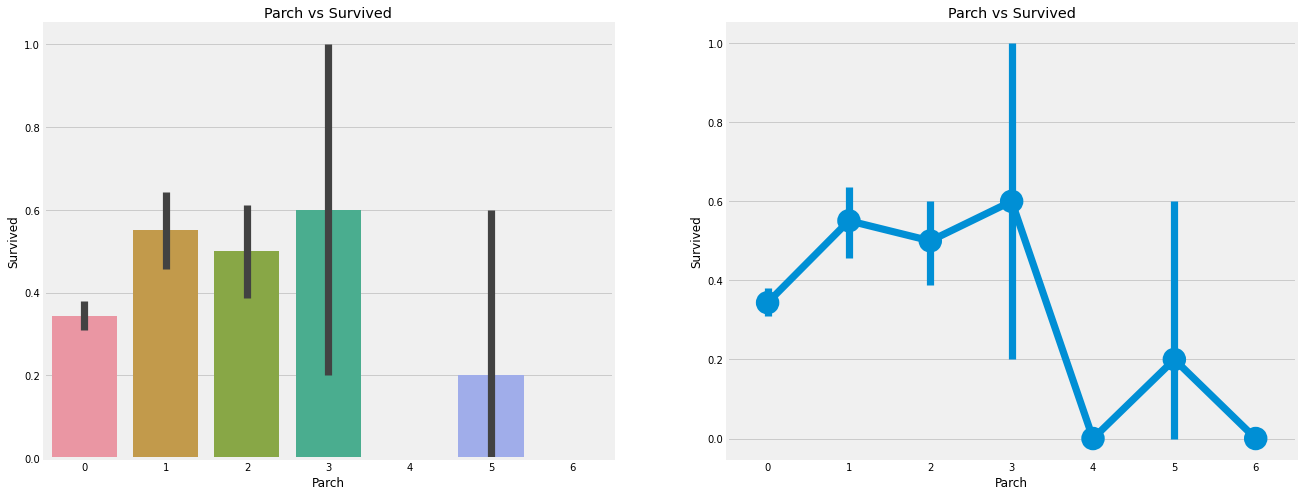

In [33]:
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot('Parch','Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

#### 관찰결과:
비슷한 결과가 나왔습니다. 부모님, 아이와 함께 탑승한 승객들의 생존 확률은 높았습니다. 하지만 그 수가 증가할수록 생존률은 감소했습니다. 

1~3명의 부모님, 아이와 탑승한 승객의 생존률이 좋았습니다. 혼자 탑승한 경우, 생존하기가 어려우며, 가족이 4명 이상 탑승한 경우에도 생존률은 감소했습니다.

#### Fare --> Continuous Feature

In [34]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


가장 낮은 요금은 0원입니다. 

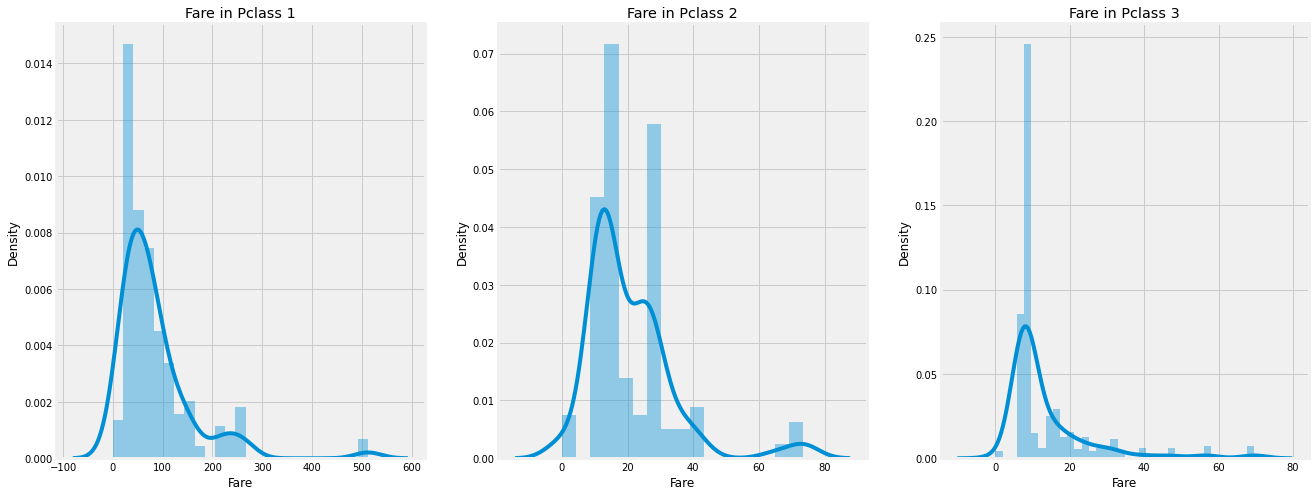

In [35]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fare in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fare in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fare in Pclass 3')
plt.show()

Pclass1 탑승객의 경우 요금 분포가 넓게 퍼져있습니다. 그리고 Pclass의 등급이 낮아질 때마다 분포는 좁아집니다. 이 변수는 연속형이기 때문에, 우리는 binning을 통해 이산형 값들로 변환해줄 것입니다.

#### 모든 Feature들의 관찰 결과 요약:



*   Sex : 여성의 생존확률이 남성에 비해 높았습니다.

*   Pclass : 1st클래스 탑승객의 생존률이 높은 경향을 보였습니다. Pclass 3의 생존률은 매우 낮았습니다. 여성의 경우 Pclass 1 탑승객의 생존률은 거의 1이었고, Pclass 2의 경우에도 높았습니다. 결국 생존에는 돈이 중요했습니다.

*   Age : 5-10세보다 적은 어린이들의 생존확률이 높았습니다. 15-35세의 탑승객들은 많이 사망했습니다.

*   Embarked : 흥미로운 Feature였습니다. 다수의 Pclass 1 탑승객이 S에서 제일 많았지만, C에서 탑승한 승객의 생존률이 더 높았습니다. Q에서 탑승한 승객은 거의 다 Pclass 3에 속했습니다.

*   Parch + SibSp : 1-2명의 형제자매, 1-3명의 가족, 자녀와 함께 탑승한 경우가 혼자 탑승 또는 많은 수의 가족과 함께 탑승한 경우보다 훨씬 생존률이 높았습니다.



#### Correlation Between The Features

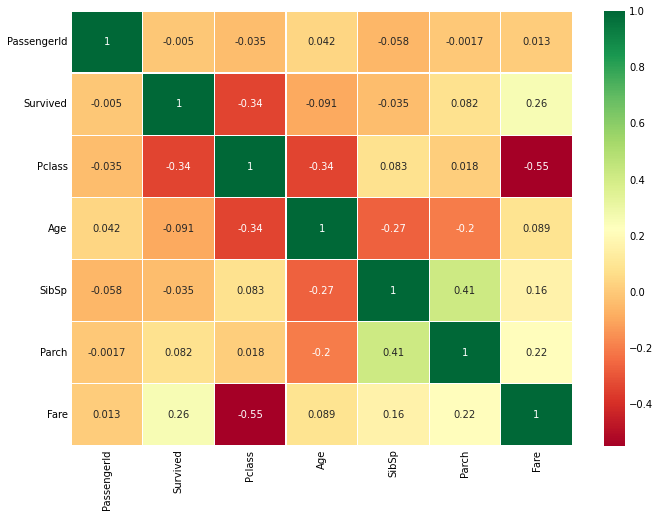

In [36]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths= 0.2) ## data.corr() 상관관계 행렬
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

##### Heatmap의 해석


먼저 알아야 할 것은, 숫자데이터가 아닌 문자열 데이터의 상관관계는 구할 수 없다는 것입니다. plot을 이해하기 전에 상관관계가 무엇인지 보겠습니다.

  - 양의 상관관계(Positive Correlation): feature A의 증가하는데 featureB가 증가한다면, 두 feature는 양의 상관관계입니다. 1은 완전 양의 상관관계를 의미합니다.

  - 음의 상관관계(Negative Correlation) : feature A의 감소하는데 feature B가 증가한다면 , 두 feature는 음의 상관관계입니다. -1은 완전 음의 상관관계를 의미합니다.

두 Feature가 상당히 높은, 혹은 완전한 양의 상관관계를 가지고 있다고 하면, 한 feature값이 증가하면 다른 feature의 값도 증가합니다. 이것은 두 feature가 매우 비슷한 정보를 가지고 있으며, 그 정보 간의 분산이 거의 없다는 것을 의미합니다. 이를 다중공선성(MultiColinearity)이라 합니다.

이 변수들이 redundant할 떄, 우리는 그 변수를 둘 다 사용해야 할까요? 모델을 만들거나 학습시킬 때, 학습 시간을 줄이는 등 다른 이점을 위해 redudant한 feature는 제거되도록 해야합니다.

위의 Heatmap을 보았을 때, feature들 간의 상관관계는 그렇게 높아보이지 않습니다. 가장 높은 상관관계를 지닌 두 변수는 SibSp와 Parch로 상관계수는 0.41입니다. 그렇기 때문에 모든 feature를 사용하도록 하겠습니다.

- 다중공선성(多重共線性)문제(Multicollinearity)는 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제이다. 독립변수들간에 정확한 선형관계가 존재하는 완전공선성의 경우와 독립변수들간에 높은 선형관계가 존재하는 다중공선성으로 구분하기도 한다. 이는 회귀분석의 전제 가정을 위배하는 것이므로 적절한 회귀분석을 위해 해결해야 하는 문제가 된다.

- 상관관계가 높은 독립변수중 하나 혹은 일부를 제거
- 변수를 변형시키거나 새로운 관측치를 이용
- 자료를 수집하는 현장의 상황을 보아 상관관계의 이유를 파악하여 해결
- 주성분 분석(PCA,Principle Component Analysis)를 이용한 diagonal matrix의 형태로 공선성을 없애준다

## Par2 : Feature Engineering and Data Cleansing

Feature Engineering이 무엇일까요? feature들이 있는 dataset이 주어졌을 때, 모든 feature가 중요하진 않습니다. 제거되어야 할 redundant한 Feature가 있을 수 있습니다. 그리고 다른 feature의 관찰, 정보 추출을 통해 새로운 feature를 만들 수 있습니다.

Name으로부터 Initial을 만들어 낸 것도 한 예입니다. 새로운 feature를 만들거나 제거해야할 Feature가 있는지 살펴보겠습니다. 

그리고 예측모델을 적합한 형태로 feature들을 변화하겠습니다.

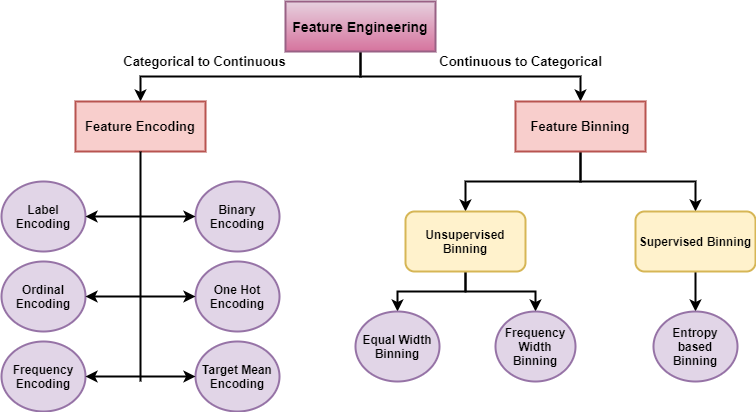

### Age_band

#### Problem with Age Feature:

먼저 언급했듯이, Age는 continuous feature입니다. continuous feature의 경우, 머신러닝 모델에 있어 문제가 하나 있습니다. 가령, 운동선수들을 성별로 그룹을 나눈다고 할 때, 우리는 쉽게 남성, 여성으로 나눌 수 있습니다. 연령으로 그룹을 나눈다고 할 때, 어떻게 나눌 수 있을까요? 만약 30명의 사람에 30개의 연령값이 있다고 하겠습니다. 이런 경우가 문제가 됩니다. 

우리는 continuous 값을 category값으로 Binning이나 Nomalization을 통해 변환해야 합니다. 이번에 binning을 통해 연령에 하나의 값을 할당하겠습니다.

최대 연령이 80세이기 때문에, 0부터 80세까지의 연령은 5개의 bin으로 나누겠습니다. 80/5=16이기 때문에, bin 하나의 사이즈는 16입니다.

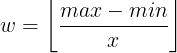

In [37]:
data['Age_band'] = 0 

data.loc[data['Age'] <= 16, 'Age_band'] = 0 
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[(data['Age']>64), 'Age_band'] = 4

data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [38]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer') # 각 연령구간의 탑승객 수 체크

,Age_band
1,382
2,325
0,104
3,69
4,11


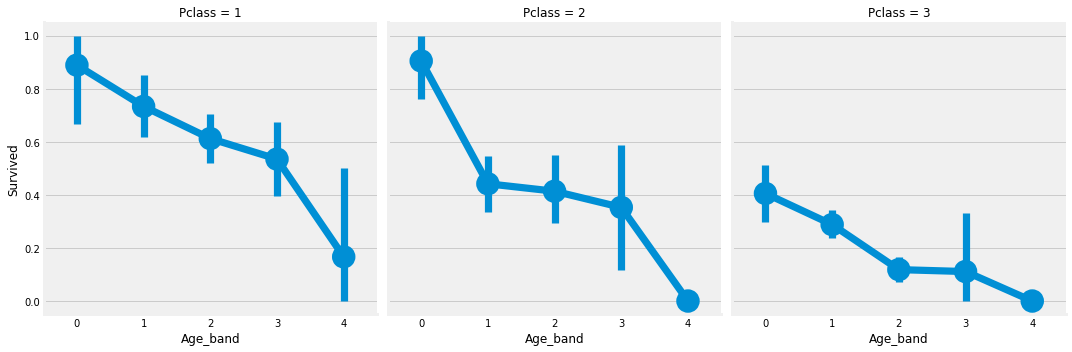

In [39]:
sns.factorplot('Age_band','Survived', data=data, col='Pclass')
plt.show()

Pclass와 관계없이 연령이 증가할수록 생존률이 낮아집니다.

### Family_Size와 Alone

이번에는 'Family_size'와 'Alone' Feature를 만들어 분석하겠습니다. 이 Feature들은 Parch와 SibSp의 요약입니다. 가족의 수와 생존률의 관계를 체크하기 위한 통합된 데이터를 얻을 수 있습니다. 

Alone은 승객이 혼자인지 아닌지 나타냅니다.

In [40]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] # Family_Size
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] =1 # Alone

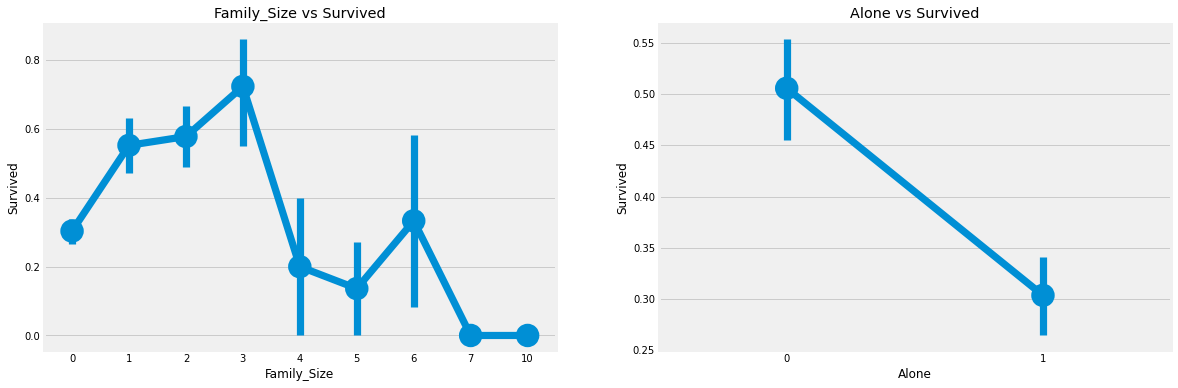

In [41]:
f, ax = plt.subplots(1,2, figsize=(18,6))
sns.pointplot('Family_Size' , 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot('Alone','Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

Family_Size = 0은 탑승객이 혼자임을 의미합니다. 혼자일 떄, 생존률은 매우 낮습니다. 가족 수가 4명 이상일 때도 생존률은 감소합니다. 때문에 모델링에 중요한 Feature인 것 같습니다. 조금 더 분석해보겠습니다.

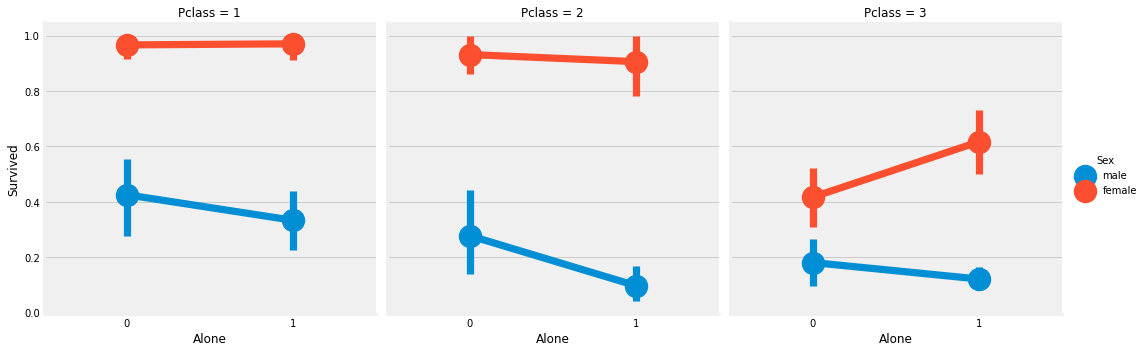

In [42]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col = 'Pclass')
plt.show()

Pclass와 무관하게 혼자 탑승한 경우는 위험합니다. 하지만 예외적으로 Pclass 3 여성 탑승객의 생존률은 가족과 함께 탑승하지 않은 경우보다 오히려 높습니다.

### Fare_Range

Fare는 연속형 Feature이기 때문에, 이것은 서수형 값(Ordinal value)로 변환하겠습니다. 이 작업에 pandas.qcut을 사용할 것입니다. 

qcut은 우리가 입력한 구간의 수(bin)에 따라 데이터 값을 분할해줍니다. 가령 우리가 5개 구간을 입력하면, 5개의 구간으로 데이터 수를 균일하게 분할합니다.

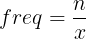

In [43]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 얘기한 것처럼, Fare_Range가 증가할수록 생존률도 증가합니다. 

하지만 우리는 Fare_Range를 그대로 사용할 수 없습니다. Age_Band에서 했던 것과 동일하게 하나의 값으로 변환해주어야 합니다.

In [44]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

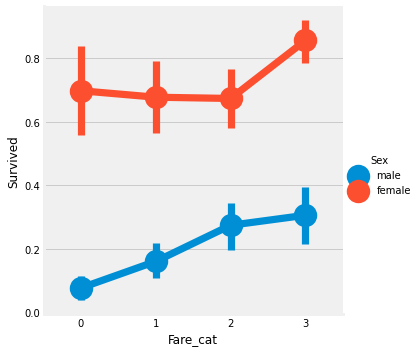

In [45]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

Fare_cat이 증가할수록 생존률이 증가합니다. 이것도 sex와 함께 모델링에 중요한 Feature가 될 것 같습니다.

### 문자열 값을 숫자형으로 변환하기

문자열 값을 머신러닝 모델에 사용할 수 없기 때문에 Sex, Embarked등의 feature를 숫자값으로 변환해주어야 한다.

In [46]:
data['Sex'].replace(['male','female'], [0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

### 필요하지 않은 Feature를 Drop하기

- Name -> Categorical value로 변환할 수 없으므로 필요 없습니다.
- Age -> Age_band가 있기 때문에 필요 없습니다.
- ticket -> 카테고리화 될 수 없는 무작위 문자열입니다.
- Fare -> Fare_cat이 있기 때문에 필요없습니다.
- Cabin -> NaN값이 너무 많고, 많은 승객에 따라 cabin값이 너무 많습니다. 그렇기 때문에 필요 없습니다.
- Fare_Range -> Fare_cat이 있어서 필요 없습니다.
- PassengerId -> 카테고리화 할 수 없습니다.

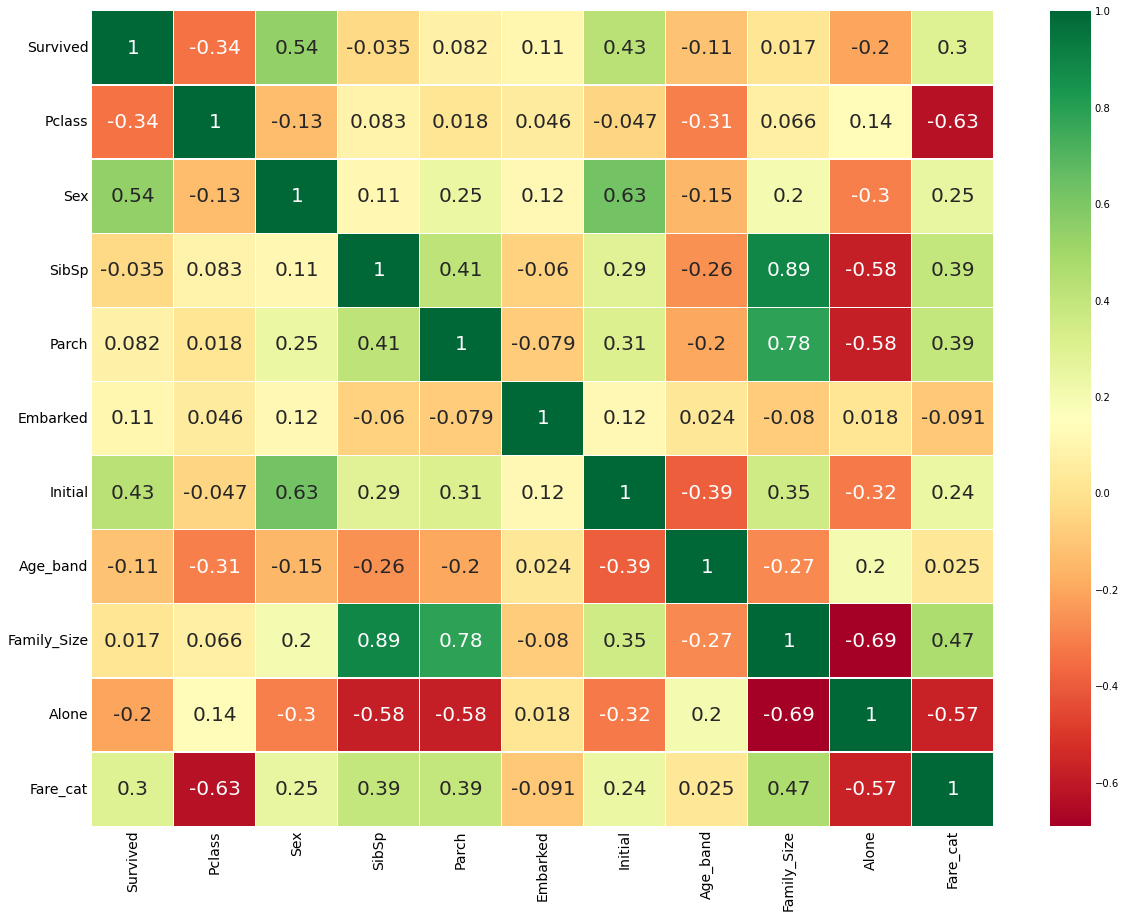

In [47]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size' : 20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

위의 Correlation plot에서 몇몇 양의 상관관계를 가진 feature들을 볼 수 있습니다. SibSp, Family_Size와 Parch가 양의 상관관계를 가지고, Alone과 Family_Size는 음의 상관관계를 가지고 있습니다.

## Part3: Predictive Modeling

EDA를 통해 인사이트를 얻었습니다. 하지만 그것만으로 승객의 생존 여부를 정확히 예측할 수 없었습니다. 우리는 몇몇 훌륭한 분류 알고리즘을 사용하여 승객의 생존여부를 예측할 것입니다. 아래의 알고리즘을 모델을 만드는데 사용할 것입니다.



1.   Logistics Regression
2.   Support Vector Machines (Linear and radial)
3.   Random Foreset
4.   K-Nearest Neighbours
5.   Naive Bayes
6.   Decision Tree
7.   Logistic Regression



In [48]:
# importing all the required ML packages
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn import svm # support vector machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree

from sklearn. model_selection import train_test_split # training and testing data split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix # confusion matrix

In [49]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify = data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [50]:
model = svm.SVC(kernel = 'rbf' , C =1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ' , metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machines(linear-SVM)

In [51]:
model = svm.SVC(kernel = 'linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


### Logistic Regression

In [52]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy of the Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

Accuracy of the Logistic Regression is  0.8134328358208955


### Decision Tree

In [53]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy of the Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

Accuracy of the Decision Tree is  0.8022388059701493


### K-Nearest Neighbors(KNN)

In [54]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy of the KNN is ' , metrics.accuracy_score(prediction5, test_Y))

Accuracy of the KNN is  0.8134328358208955


KNN 모델의 정확도는 n_neighbors 값을 조절하면 변화합니다. 기본값은 5입니다. n_neighbors의 여러 값에 따른 정확도를 체크해보겠습니다.

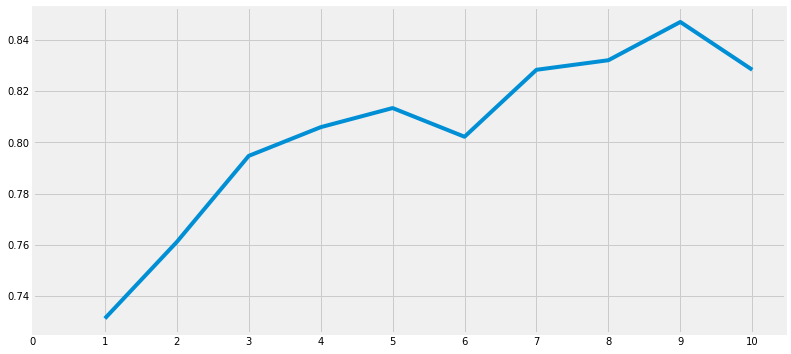

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [55]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())


### Gausian Naive Bayes

In [56]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [57]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is' , metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8208955223880597


모델의 정확도가 분류기의 robustness를 결정하는 유일한 요소는 아닙니다. 분류기가 훈련 데이터로 학습하고, 테스트 데이터로 테스트 했을 때, 정확도가 90%였다고 합시다. 분류기의 정확도가 매우 높은 것처럼 보입니다. 하지만 다른 테스트 셋에 대해서도 90%가 나올까요? 

그렇지 않습니다. 분류기가 학습하기 위해 어떤 사건을 사용할지 결정할 수 없기 때문입니다. 훈련 데이터와 테스트 데이터가 변하면, 정확도도 변하게 됩니다. 이것을 Model Variance라고 합니다.

이런 점을 극복하고 일반화된 모델을 얻기 위해 Cross Validation(교차검증)을 사용합니다.

### Cross Validation(교차검증)

많은 경우에 데이터는 불균형합니다. 많은 수의 class 1  객체들이 존재하지만 다른 class 객체들은 적을 수 있습니다. 그렇기 때문에 데이터 셋 각각의 모든 객체에 알고리즘을 훈련시키고 테스트해야 하비다. 그 때, 우리는 각 데이터 셋에서 나온 정확도들의 평균을 이용할 수 있습니다.

1. K-Fold Cross Validation에서는 먼저 데이터 셋을 K개의 서브 데이터셋으로 나눕니다.
2. 우리가 데이터셋을 5개로 나눴다고 하면, 1개의 데이터셋은 테스트용으로 나머지 4개는 훈련용으로 사용합니다.
3. 각 수행시마다 테스트 셋을 바꿔주고, 다른 셋에 대해 알고리즘을 훈련시키면서 이 프로세스를 계속해나갑니다.

정확도와 오차는 평균화되어 알고리즘의 평균 정확도를 얻을 수 있습니다. 이것은 K-Fold Cross Validation이라고 합니다.
4. 일부 데이터 셋에서는 underfit(과소적합), 다른 데이터셋에는 overfit(과대적합)될 수 있습니다. 때문에 cross validation을 통해서, 우리는 일반화된 모델을 얻을 수 있습니다.

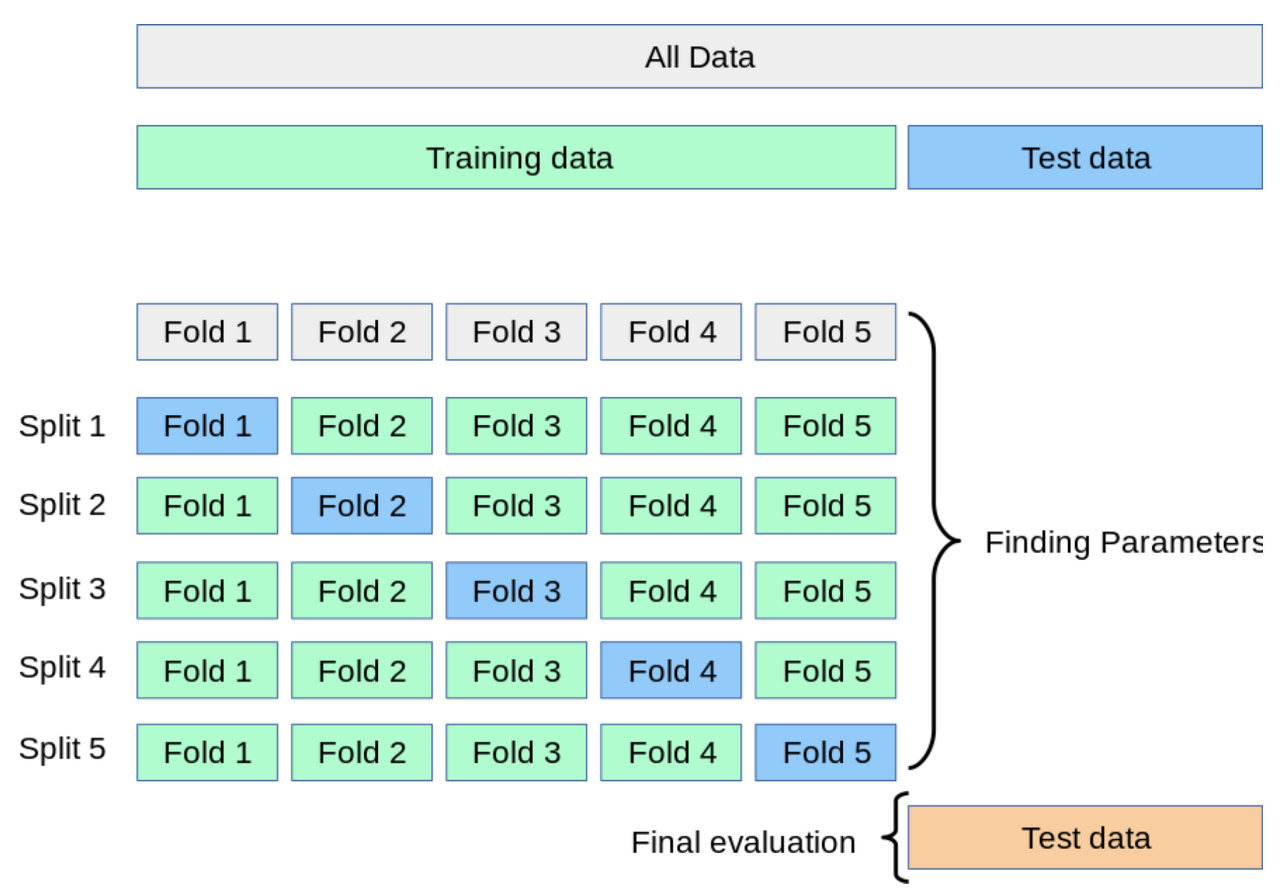

In [58]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.803608,0.043503
Naive Bayes,0.795843,0.054861
Random Forest,0.810375,0.049110


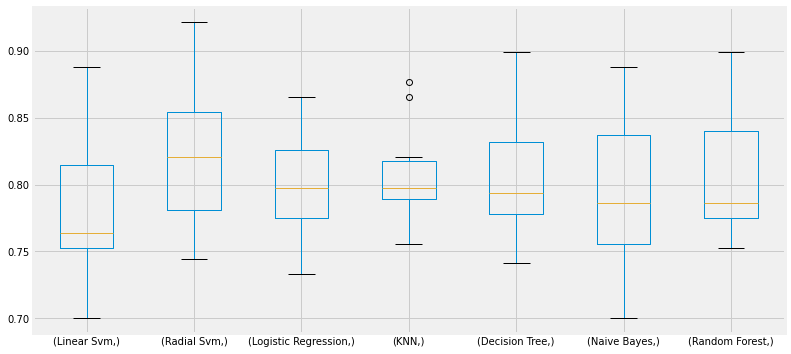

In [59]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

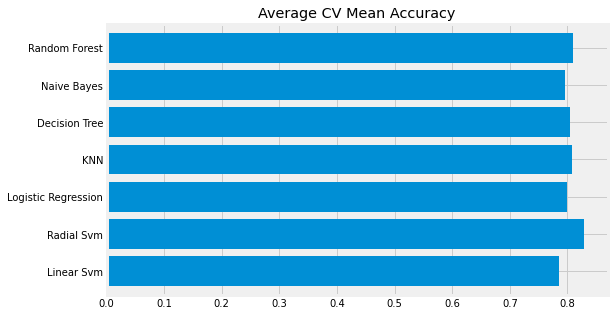

In [60]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도는 데이터 불균형으로 인해 잘못된 결론을 낼 수 있습니다. 혼동행렬을 이용해 요약된 결과를 얻을 수 있는데,

이 혼동행렬은 모델이 어디에서 잘못되었는지, 어떤 클래스를 모델이 잘못 예측했는지를 보여줍니다.

### Confusion Matrix

혼동행렬은 분류기에 의해 나온 정확한, 또는 부정확한 분류의 개수를 보여줍니다.

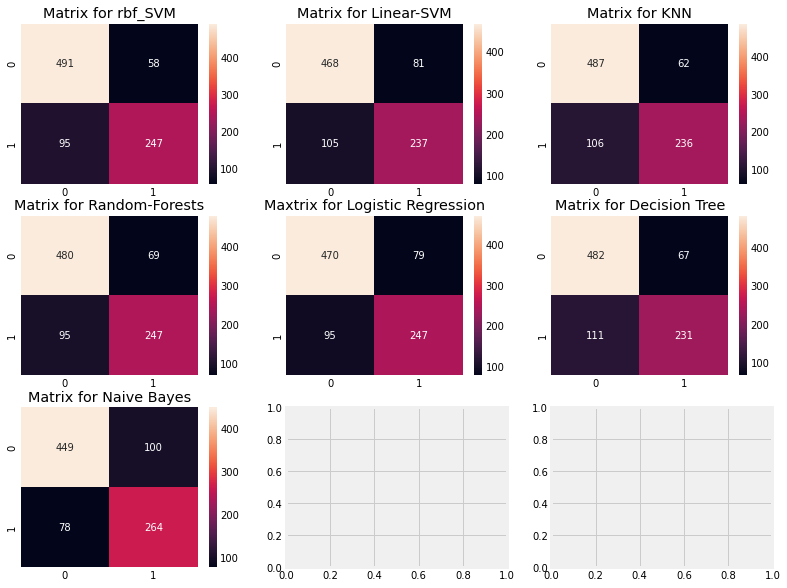

In [61]:
f, ax = plt.subplots(3, 3, figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf_SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Maxtrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

#### 혼동행렬의 해석

왼상단 - 우하단 대각선은 각 객체에 대한 정확한 예측의 수, 우상단 - 좌하단 대각선은 잘못된 예측의 수를 말합니다.

첫번째 plot의 rbf-SVM을 보겠습니다.
1. 정확한 예측의 수는 491(사망) +247(생존)으로 평균 CV정확도(mean CV accuracy)는 (491+248)/891 = 82.8%입니다.
2. Errors(오류) -> 58명의 사망자들이 생존자로 분류되었고, 95명의 생존자들이 사망자로 분류되었습니다. 

죽은 사람을 살아있다고 예측하면서 더 많은 실수가 발생했습니다. 각각의 행렬을 보면 rbf-SVM이 사망자를 예측하는데 보다 정확하다고 볼 수 있습니다. 반면, Naive Bayes는 생존자를 예측하는데 보다 정확했습니다.

#### 하이퍼 파라미터 튜닝

머신러닝 모델은 블랙박스 같습니다. 이 블랙박스에는 기본 파라미터 값이 있는데, 우리는 이것을 조절함으로써 더 좋은 모델을 얻을 수 있습니다. SVM 모델의 C와 gamma같이 다른 분류기에는 다른 파라미터들이 있는데, 이들은 하이퍼 파라미터라고 합니다. 이 하이퍼 파라미터를 튜닝해서 모델의 학습률을 변경해줄 수 있고 더 좋은 모델을 얻을 수 있습니다. 이것을 하이퍼 파라미터 튜닝 이라고 합니다.

좋은 결과를 보였던 2개 분류기(SVM, RandomForest)의 하이퍼파라미터를 튜닝하겠습니다.

모델이 학습할 수 없어서 사용자가 지정해야만 하는 파라미터를 하이퍼파라미터라고 한다. 

### SVM

In [62]:
from sklearn.model_selection import GridSearchCV
C=[0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma} 
#  파라미터 C를 이용해서 SVM 모델이 오류를 얼마나 허용할 것인지 조정 / kernel은 데이터 셋의 형태에 따라 다르다 / gamma는 학습데이터에 얼마나 민감하게 반응할 것이냐를 정하는 것
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


###  Random Forests

In [63]:
n_estimators=range(100,1000,100)
hyper = {'n_estimators':n_estimators} # n_estimators : 생성할 tree의 개수
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True) # param_grid : 파라미터의 이름
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


Rbf-SVM의 최고 점수는 C = 0.5, gamma=0.1일 때인 82.82%이고, RandomForest는 n_estimators=900일 때는 81.7%입니다.

### Ensembling

앙상블은 모델의 정확도와 성능을 높이기 위한 좋은 방법입니다. 간단한 말로, 하나의 강력한 모델을 만들기 위한 여러 단순한 모델의 조합입니다. 핸드폰을 사기 위해 많은 사람들에게 여러 파라미터에 대해 질문을 했다고 가정합시다. 그 후 우리는 모든 파라미터들을 분석한 뒤에 제품에 대한 판단을 할 수 있을 것입니다. 이것이 모델의 안정성을 향상시켜주는 앙상블입니다. 앙상블은 다음의 방법으로 수행할 수 있습니다.

1. Voting Classifier
2. Bagging
3. Boosting

#### Voting Classifier

Voting Classifier는 많고 다양한 단순한 학습 모델로부터 예측들을 결합하는 가장 단순한 방법입니다. 예측값은 각 서브모델 예측치의 평균치입니다. 각 서브 모델들은 다 다른 유형의 모델입니다.

In [64]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                                ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                                ('LR' , LogisticRegression(C=0.05)),
                                                ( 'DT' , DecisionTreeClassifier(random_state=0)),
                                                ('NB' , GaussianNB()),
                                                ('svm' , svm.SVC(kernel = 'linear', probability=True))
                                                ], voting='soft'). fit(train_X, train_Y)
print('The accuracy for ensembled model is:' , ensemble_lin_rbf.score(test_X, test_Y))
cross=cross_val_score(ensemble_lin_rbf, X,Y, cv=10, scoring = 'accuracy') # scoring = 예측 성능 평가 지표 / cv = 교차 검증 폴드 수
print('The cross validated score is', cross.mean())                          

The accuracy for ensembled model is: 0.8171641791044776
The cross validated score is 0.8249188514357053


#### Bagging

배깅은 일반적인 앙상블 방법입니다. 데이터셋의 작은 파티션에 대해 유사한 분류기들을 적용하고, 모든 예측치에 대한 평균을 적용함으로써 작용합니다. 평균화를 통해 분산이 감소됩니다. Voting Classifier와는 달리 배깅은 유사한 분류기를 사용합니다.

#### Baggd KNN

배깅은 분산이 높은 모델에 가장 잘 작용합니다. 그 예는 Decision Tree나 Random Forests입니다. 우리는 n_neighbor의 작은 값을 적용하여 KNN을 n_neighbors의 작은 값으로 사용해보겠습니다.

In [65]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is : ' , metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring = 'accuracy')
print('The cross validated score for bagged KNN is : ', result.mean())

The accuracy for bagged KNN is :  0.832089552238806
The cross validated score for bagged KNN is :  0.8104244694132333


#### Bagged Decision Tree

In [66]:
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is : ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for bagged Decision Tree is : ', result.mean())

The accuracy for bagged Decision Tree is :  0.8208955223880597
The cross validated score for bagged Decision Tree is :  0.8171410736579275


### Boosting

부스팅은 분류기의 순차적인 학습을 이용한 앙상블 기법입니다. 순차적으로 약한 모델을 향상시켜 나갑니다. 부스팅은 아래와 같이 작동합니다:

모델은 처음 전체 데이터셋에 대해 학습합니다. 이때 모델은 일부 객체는 올바르게, 일부 객체는 틀리게 예측할 것입니다. 그 다음 시행에서, 틀리게 예측한 객체에 더욱 가중치를 두어 학습합니다. 결과적으로 틀리게 예측한 객체를 올바르게 예측하려고 노력합니다. 이런 과정이 반복되면서, 정확도가 한계에 도달할 때까지 새 분류기가 모델에 추가됩니다.

In [67]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting

이번에도 약한 학습기는 Decision Tree입니다.

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate= 0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring = 'accuracy')
print('The cross validated score for Gradient Boosting is : ' , result.mean())

The cross validated score for Gradient Boosting is :  0.8115230961298376


#### XGBoost

In [69]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is : ' , result.mean())

The cross validated score for XGBoost is :  0.8115480649188515


AdaBoost가 가장 높은 정확도를 기록했습니다. 이 정확도를 하이퍼파라미터 튜닝을 통해 더 높여보겠습니다.

##### AdaBoost의 하이퍼 파라미터 튜닝

In [70]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


AdaBoost의 정확도는 n_estimator가 200, learning_rate = 0.05일 때, 83.16%로 가장 높았습니다.

#### 베스트 모델에 대한 혼동행렬

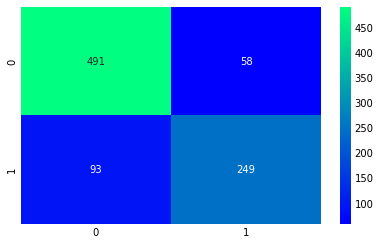

In [71]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

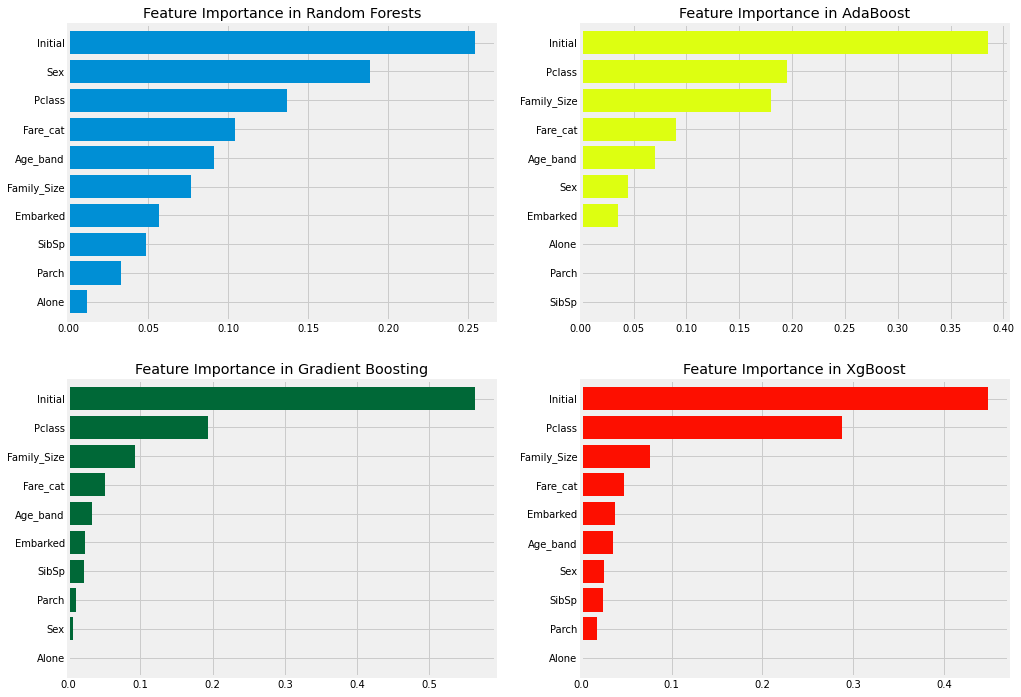

In [72]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

Random Forest, Adaboost 등 여러 모델들에 대한 feature importance를 볼 수 있습니다.

1. 공통적으로 중요한 feature는 Initial, Fare_cat, Pclass, Family_Size입니다.
2. Sex는 그렇게 중요도가 높지 않았는데, 앞선  분석에서 Pclass와 함께 보았을 때 성별이 중요한 요소였던 것을 생각하면 놀라운 결과입니다. 성별은 Random Forest모델에서만 중요해보입니다. 하지만 많은 분류기의 최상단에 있는 Initial은 Sex과 양의 상관관계에 있습니다. 결국, 두 정보 모두 성별에 대한 정보를 담고 있습니다.
3. 이와 비슷하게 Pclass와 Fare_cat 모두 탑승객의 지위와 Family_Size, Alone, Parch, SibSp의 정보를 담고 있습니다.

# 자료 출처

1. Feature 특성 설명https://eda-ai-lab.tistory.com/13
2. feature engineering 사진https://towardsdatascience.com/feature-engineering-deep-dive-into-encoding-and-binning-techniques-5618d55a6b38
3. k-fold 사진 https://wooono.tistory.com/105 
4. n_estimators https://woolulu.tistory.com/28
5. CV / Scoring https://wpaud16.tistory.com/64?category=907539